**#####################################################################**<br></br>
EHS Integration and Engineering Solutions<br></br>
<br></br>
COVID-19 data analysis - https://github.com/ehsintegration/COVID-19<br></br>
<br></br>
To evaluate an In[] cell, Click on the cell, and press shift-enter.<br></br>
**#####################################################################**<br></br>

In [1]:
%matplotlib notebook

In [2]:
1+1 

2

#####################################################################<br></br>
<br></br>
# COVID-19 SIR model<br></br>
https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/<br></br>
https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html<br></br>
<br></br>
#####################################################################<br></br>
<table align="left">
  <thead>
    <tr>
      <th style="text-align: left">Country</th>
      <th style="text-align: left">beta</th>
      <th style="text-align: left">gamma</th>
      <th style="text-align: left">R0</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: left">Japan</td>
      <td style="text-align: left">0.00000927</td>
      <td style="text-align: left">0.01837935</td>
      <td style="text-align: left">0.00050458</td>
    </tr>
    <tr>
      <td style="text-align: left">South Korea</td>
      <td style="text-align: left">0.00001298</td>
      <td style="text-align: left">0.00000001</td>
      <td style="text-align: left">1297.76738269</td>
    </tr>
    <tr>
      <td style="text-align: left">Italy</td>
      <td style="text-align: left">0.00001713</td>
      <td style="text-align: left">0.01414756</td>
      <td style="text-align: left">0.00121065</td>
    </tr>
    <tr>
      <td style="text-align: left">Iran</td>
      <td style="text-align: left">0.00003974</td>
      <td style="text-align: left">0.08023309</td>
      <td style="text-align: left">0.00049526</td>
    </tr>
  </tbody>
</table>

<IPython.core.display.Javascript object>


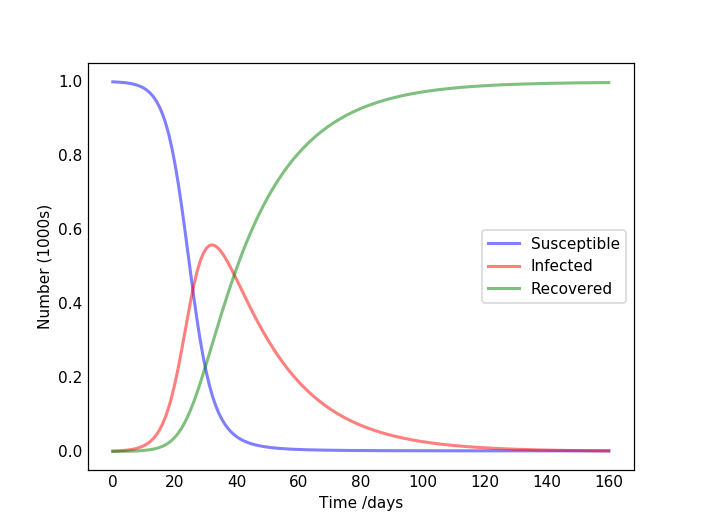

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0.00121065
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.325,  1./20   #0.01414756  #1./10

num_days = 160

# A grid of time points (in days)
t = np.linspace(0, num_days, num_days)

# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.ion()
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):        
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

ax.clear()
ax.plot(t, S/1000,  'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000,  'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000,  'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
    
fig.canvas.draw()
fig.canvas.flush_events()
plt.pause(0.5)
